# Vegetative Growth

In nature plant species vary in their ability to adjust their growth (and thus morphology, physiology) in response to a unique environment: phenotypic plasticity.

Luckily for us, the **vegetative growth** of the oil palm **is fairly in-plastic (in-variable)**:

Roughly speaking, the vegetative growth follows a constant pattern: fronds (and thus the trunk) grow at a regular rate --- root growth is less well-understood.

To illustrate this consider the following graph of observations of generative/vegetative growth versus total growth:

(source: Corley and Tinker, 2005)

<img src="images/plasticity.png" alt="Plasticity of growth">

Thus, given some simple measurements **we can reliably model vegetative growth!**

In this example we will consider the modelling of vegetative growth in PalmSim.

To do so let us first (as always) import some basic python libraries (technical detail) and PalmSim.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib

%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('..')

from palmsim import PalmField

..\palmsim\components\fronds.py:205: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  ''')
..\palmsim\components\fronds.py:221: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  ''')
..\palmsim\components\fronds.py:263: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  ''')
..\palmsim\components\trunk.py:103: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  ''')
..\palmsim\components\trunk.py:116: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/lo

# Weather

Here let us consider Sumatran weather data.

In [4]:
weather_df = pd.read_csv('input/North Sumatra.csv',index_col='Date')
weather_df = weather_df.set_index(pd.to_datetime(weather_df['solar (MJ/m2/day)'].index))

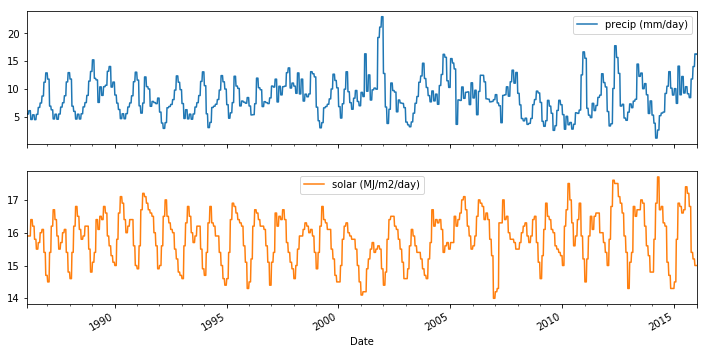

In [5]:
weather_df[['precip (mm/day)','solar (MJ/m2/day)']].plot(subplots=True,figsize=(12,6));

# PalmSim

Now let us run PalmSim and consider vegetative growth by highlighting the following model elements:

    - Weather
    - Fronds
    - Assimilate Pool
    - Trunk
    - Roots

In [6]:
# Initiatilize a field at DOP 1986 (coincides with the first weather data)
p = PalmField(year_of_planting = 1986)

# Attach the weather data
p.weather.radiation_series = weather_df['solar (MJ/m2/day)']
p.weather.rainfall_series = weather_df['precip (mm/day)']

# Run the model for 360 months.
df = p.run(duration=365*30)

# Weather

Solar radiation drives plant growth. The main consideration here is that only a fraction of the sun-light is absorbed by the plant for this purpose --- the so-called photo-synthatically active radiation (PAR).

Here the fraction of PAR is taken into account to come to typically around 8 MJ/m2/day of photo-synthatically active radiation.

By running the following command we can inspect the status of the weather in the model:

In [7]:
p.weather

Object: Weather

Property                                     Value Unit        
--------------------------------------------------------------
ET_potential                                 2.179  mm/d        
PAR                                          7.636  MJ/m2/day   
aerodynamic_resistance                     103.832  s/m         
bulk_surface_resistance                     69.444  s/m         
canopy_net_radiation_capture                 9.414  MJ/m2/d     
canopy_net_radiation_capture_reference       8.040  MJ/m2/d     
daylength                                   12.000  hour        
eccentricity_factor                          1.028  1           
fraction_diffuse                             0.704  1           
hour_of_dawn                                 6.000  bool        
hour_of_dusk                                18.000  bool        
humidity                                    86.000  %           
humidity_series_mean                        86.000  %           
radiation  

Note, given no data on the number of raindays we opt for a default number, here 15 days/month --- note, this is only of interest for water limited production.

# Fronds

The fronds emerge with a plastochron (time between emergent frond) of 8 (very young palm) to 16 days (mature palm):

Text(0.5, 1.0, 'Plastrochron (day)')

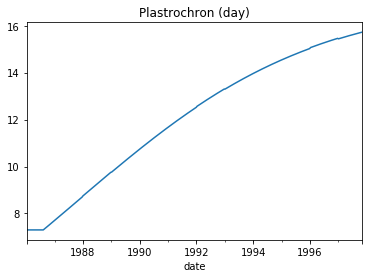

In [8]:
# note, to list all available output run "list(df)".
df['fronds_plastochron (day)'].plot()
ax = plt.gca()
ax.set_title('Plastrochron (day)')

Each frond grows from a spear to an expanded leaf. We can model the resulting leaf area as a function of palm age (see e.g. Gerritsma, W. and Soebagyo, F.X., 1998):

Text(0.5, 1.0, 'Frond leaf area (m2)')

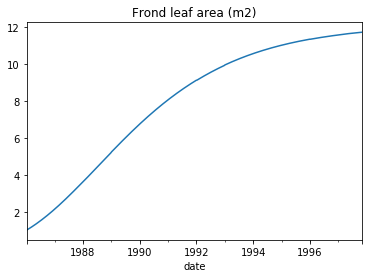

In [9]:
df['fronds_mean_leaf_area (m2/frond)'].plot()
ax = plt.gca()
ax.set_title('Frond leaf area (m2)')

Accordingly the canopy closes as quantified by the fraction of intercepted light:

Text(0.5, 1.0, 'Fraction light intercepted (-)')

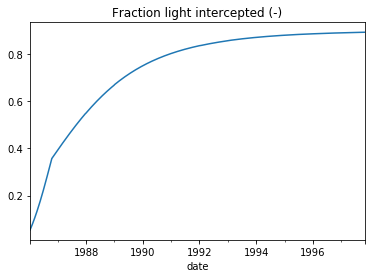

In [10]:
df['fronds_fraction_intercepted (1)'].plot()
ax = plt.gca()
ax.set_title('Fraction light intercepted (-)')

Let us inspect the fronds in the model:

Note, since we ran the model for 360 months here we consider the fronds at this time.

In [11]:
p.fronds

Object: Fronds

Property                                     Value Unit        
--------------------------------------------------------------
LUE                                          4.286  g_CH2O/MJ PAR
assim_growth                                25.953  kg_CH2O/ha/day
assim_produced                             327.133  kg_CH2O/ha/day
count                                     5765.335  1/ha        
count_change_rate                            0.000  1/ha/day    
count_growth_rate                            9.097  1/ha/day    
count_loss_rate                              9.097  1/ha/day    
count_per_palm                              40.317  1/palm      
fraction_intercepted                         0.892  1           
fronds_goal_count                         5765.335  1/ha        
fronds_goal_count_per_palm                  40.317  1/palm      
initiation_rate                              0.064  1/palm/day  
intercepted_PAR                             68.136  GJ/ha/day   
leaf_ar

Note that the fronds have a "potential growth rate" (determined by the breed) and thus an associated "potential sink strength".

These are related by the efficiency of (dry-matter) growth, the so-called "conversion efficiency" (g DM growth/g assimilate).

Note, furthermore, the variability in the standing frond mass over time due to <b> pruning </b>.

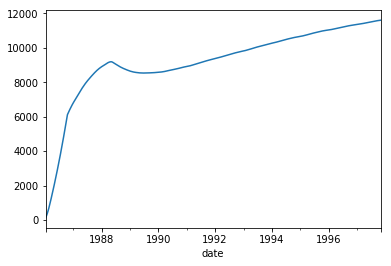

In [12]:
# the total frond mass over time
df['fronds_mass (kg_DM/ha)'].plot()

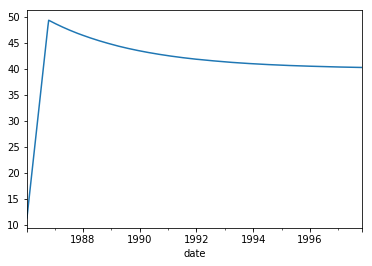

In [13]:
df['fronds_count_per_palm (1/palm)'].plot()

Most importantly the fronds produce assimilates, here "assim produced" --- around 9 ton/ha/month!

These produced assimilates drive the vegetative (and generative) growth.

# Assimilates

Assimilates produced by the fronds drive growth but also maintenance. Naturally this is considered for each of the following:
    
    - vegetative growth/maintenance
        - fronds
        - trunk
        - roots
    - generative growth/maintenance
    
You can check yourself that all the produced assimilates are directed towards growth and maintenance:

In [14]:
p.assimilates

Object: Assimilates

Property                                     Value Unit        
--------------------------------------------------------------
assim_growth_fronds                         25.953  kg_CH2O/ha/day
assim_growth_generative                    161.646  kg_CH2O/ha/day
assim_growth_roots                           8.658  kg_CH2O/ha/day
assim_growth_total                         215.600  kg_CH2O/ha/day
assim_growth_trunk                          11.938  kg_CH2O/ha/day
assim_growth_vegetative                     46.548  kg_CH2O/ha/day
assim_maintenance_fronds                    39.698  kg_CH2O/ha/day
assim_maintenance_generative                43.317  kg_CH2O/ha/day
assim_maintenance_roots                     18.954  kg_CH2O/ha/day
assim_maintenance_total                    111.540  kg_CH2O/ha/day
assim_maintenance_trunk                      9.571  kg_CH2O/ha/day
assim_maintenance_vegetative                68.223  kg_CH2O/ha/day
assim_produced                             327.1

These assimilate flows change over time in relation to the weather and age of the palm:

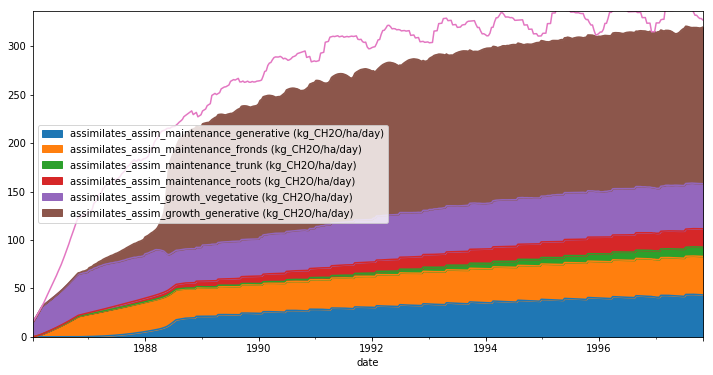

In [15]:
ax = df[['assimilates_assim_maintenance_generative (kg_CH2O/ha/day)',
     'assimilates_assim_maintenance_fronds (kg_CH2O/ha/day)',
     'assimilates_assim_maintenance_trunk (kg_CH2O/ha/day)',
     'assimilates_assim_maintenance_roots (kg_CH2O/ha/day)',
     'assimilates_assim_growth_vegetative (kg_CH2O/ha/day)',
     'assimilates_assim_growth_generative (kg_CH2O/ha/day)',
     ]].plot.area(figsize=(12,6))

df['assimilates_assim_produced (kg_CH2O/ha/day)'].plot(ax=ax)

Note, it is well-known that palms down-regulate their photo-synthesis untill the first bunches arrive. This shows as a feature in the model in terms of a gap between produced and used assimilates.

The amount of assimilates for vegetative growth directed to the fronds, trunk and roots is determined according to their (potential) sink strengths.

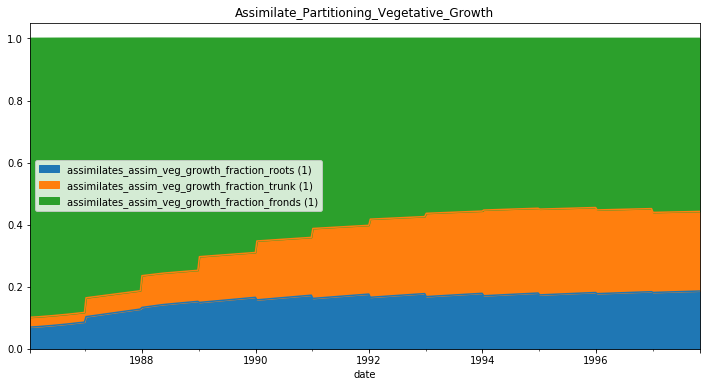

In [16]:
df[[
    'assimilates_assim_veg_growth_fraction_roots (1)',
    'assimilates_assim_veg_growth_fraction_trunk (1)',
    'assimilates_assim_veg_growth_fraction_fronds (1)']].plot.area(figsize=(12,6))
ax = plt.gca()
ax.set_title('Assimilate_Partitioning_Vegetative_Growth');

As the phyllochron decreases so does the trunk growth, considering the fronds this decrease - alower frond production rate - is compensated by the increasing leaf size. Root growth/turn-over is here considered to be relatively static.

# Trunk

Trunks grow to around 350 kg DM for a palm of 30 years old (see e.g. the 1971 paper by Corley). Given the assimilate partitioning this is what we find in the model.

In [17]:
p.trunk

Object: Trunk

Property                                     Value Unit        
--------------------------------------------------------------
assim_growth                                11.938  kg_CH2O/ha/day
density                                    166.820  kg/m3       
lignified_mass                            7077.320  kg          
lignified_mass_change_rate                   3.758  kg_DM/ha/day
maintenance_requirement                      9.594  kg_CH2O/ha/day
mass                                     26265.007  kg_DM/ha    
mass_change_rate                             8.237  kg_DM/ha/day
mass_change_rate_yearly                   3006.545  kg_DM/ha/year
mass_growth_rate                             8.237  kg_DM/ha/day
mass_loss_rate                               0.000  kg_DM/ha/day
potential_growth_actual                      1.007  kg_DM/ha/day
potential_growth_rate                        8.176  kg_DM/ha/day
potential_growth_rate_per_palm              20.869  kg_DM/palm/year
poten

Text(0.5, 1.0, 'Trunk_mass')

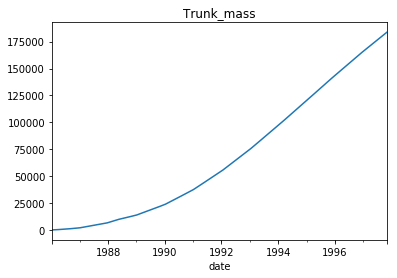

In [18]:
# trunk mass in kg DM
df['trunk_mass_per_palm'].plot()
ax = plt.gca()
ax.set_title('Trunk_mass')

# Roots

Since roots live below the ground they are not easily studied, as such relatively little is known about palm roots.

Given the knowledge that is available and the according assimilate partitioning we come to the following:

In [19]:
p.roots

Object: Roots

Property                                     Value Unit        
--------------------------------------------------------------
assim_growth                                 8.658  kg_CH2O/ha/day
maintenance_requirement                     18.975  kg_CH2O/ha/day
mass                                      8624.953  kg_DM/ha    
mass_change_rate                             0.954  kg_DM/ha/day
mass_change_rate_yearly                    348.212  kg_DM/ha/year
mass_growth_rate                             5.974  kg_DM/ha/day
mass_loss_rate                               5.020  kg_DM/ha/day
mass_per_palm                               60.314  kg_DM/palm  
potential_growth_rate                        5.935  kg_DM/ha/day
potential_growth_rate_per_palm               2.336  kg_DM/palm/year
potential_growth_realization                 1.007  1           
potential_sink_strength                      8.602  kg_CH2O/ha/day

Text(0.5, 1.0, 'roots_mass_per_palm')

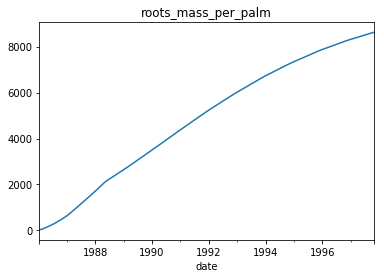

In [20]:
df['roots_mass (kg_DM/ha)'].plot()
ax = plt.gca()
ax.set_title('roots_mass_per_palm')

# Conclusion

The vegetative growth of oil palm lends itself to modelling and can be modelled in a reliable manner.

Note, in the next update of PalmSim we will model the fronds as cohorts (in the same manner as the inflorescences) which go through phenological phases --- this will be interesting in itself but will however not entail any changes to e.g. yield.

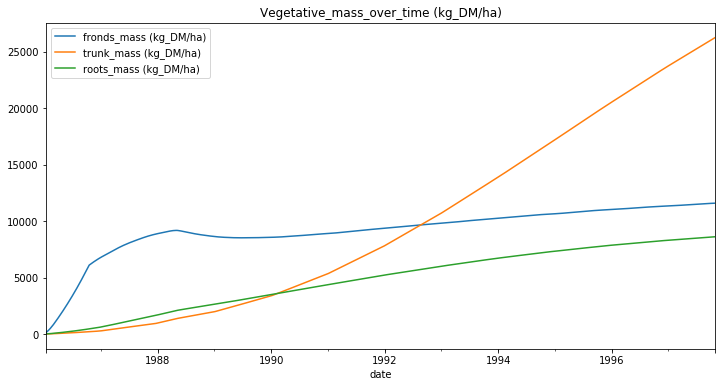

In [21]:
df[['fronds_mass (kg_DM/ha)','trunk_mass (kg_DM/ha)','roots_mass (kg_DM/ha)']].plot(figsize=(12,6))
ax = plt.gca()
ax.set_title('Vegetative_mass_over_time (kg_DM/ha)');

## Conclusion

This concludes this example.